# 6. Graphiques : Matplotlib et Seaborn

Il existe de nombreuses librairies graphiques en Python. la librairie de référence est **matplotlib** qui est un framework graphique à la MATLAB.

Nous utiliserons le sous-module **pyplot** et également la libriarie **seaborn** qui en est une extension.

Documentation :
- matplotlib : http://matplotlib.org
- seaborn : http://seaborn.pydata.org

In [1]:
# import des modules usuels
import pandas as pnd
import numpy as np
import matplotlib.pyplot as plt

# commande magique pour l'affichage des graphiques
%matplotlib inline

# options d'affichage
pnd.set_option("display.max_rows", 16)
plt.style.use('seaborn-darkgrid')

In [2]:
# chargement des données
geo = pnd.read_csv("correspondance-code-insee-code-postal.csv",
                   sep=';',
                   usecols=range(11),
                  index_col="Code INSEE")
geo.sort_index(inplace=True)
geo

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape
Code INSEE,,,,,,,,,,
01001,01400,L'ABERGEMENT-CLEMENCIAT,AIN,RHONE-ALPES,Commune simple,242.0,1565.0,0.8,"46.1534255214, 4.92611354223","{""type"": ""Polygon"", ""coordinates"": [[[4.926273..."
01002,01640,L'ABERGEMENT-DE-VAREY,AIN,RHONE-ALPES,Commune simple,483.0,912.0,0.2,"46.0091878776, 5.42801696363","{""type"": ""Polygon"", ""coordinates"": [[[5.430089..."
01004,01500,AMBERIEU-EN-BUGEY,AIN,RHONE-ALPES,Chef-lieu canton,379.0,2448.0,13.4,"45.9608475114, 5.3729257777","{""type"": ""Polygon"", ""coordinates"": [[[5.386190..."
01005,01330,AMBERIEUX-EN-DOMBES,AIN,RHONE-ALPES,Commune simple,290.0,1605.0,1.6,"45.9961799872, 4.91227250796","{""type"": ""Polygon"", ""coordinates"": [[[4.895580..."
01006,01300,AMBLEON,AIN,RHONE-ALPES,Commune simple,589.0,602.0,0.1,"45.7494989044, 5.59432017366","{""type"": ""Polygon"", ""coordinates"": [[[5.614854..."
01007,01500,AMBRONAY,AIN,RHONE-ALPES,Commune simple,309.0,3359.0,2.3,"46.0055913782, 5.35760660735","{""type"": ""Polygon"", ""coordinates"": [[[5.413533..."
01008,01500,AMBUTRIX,AIN,RHONE-ALPES,Commune simple,274.0,518.0,0.7,"45.9367134524, 5.3328092349","{""type"": ""Polygon"", ""coordinates"": [[[5.321986..."
01009,01300,ANDERT-ET-CONDON,AIN,RHONE-ALPES,Commune simple,294.0,696.0,0.3,"45.7873565333, 5.65788307924","{""type"": ""Polygon"", ""coordinates"": [[[5.656393..."
...,...,...,...,...,...,...,...,...,...,...


On va utiliser un second jeu de données open data qui provient du portail gouvernemental de la Mission Très Haut Débit accessible à l'adresse http://francethd.fr

Il s'agit des données de couverture sur le très haut débit en France par commune, par technologie (ADSL, câble et fibre optique FttH) et par débit (éligible / 3 / 8 / 30 / 100 Mbit/s).

In [25]:
# site web francethd.fr
from IPython.display import IFrame
IFrame(src="http://francethd.fr", width=800, height=600)

In [3]:
thd = pnd.read_excel("FranceTHD_Open_Data_Observatoire_Juin2015.xlsx",
                    sheetname="Communes",
                    header=1,
                    index_col="Code INSEE",
                    names=["Département", "Commune",
                                "1 Mbit", "3 Mbit", "8 Mbit", "30 Mbit", "100 Mbit",
                                "DSL 1 Mbit", "DSL 3 Mbit", "DSL 8 Mbit", "DSL 30 Mbit", "DSL 100 Mbit",
                                "Câble 1 Mbit", "Câble 3 Mbit", "Câble 8 Mbit", "Câble 30 Mbit", "Câble 100 Mbit",
                                "Fibre 1 Mbit", "Fibre 3 Mbit", "Fibre 8 Mbit", "Fibre 30 Mbit", "Fibre 100 Mbit"])
thd

,Département,Commune,1 Mbit,3 Mbit,8 Mbit,30 Mbit,100 Mbit,DSL 1 Mbit,DSL 3 Mbit,DSL 8 Mbit,...,Câble 1 Mbit,Câble 3 Mbit,Câble 8 Mbit,Câble 30 Mbit,Câble 100 Mbit,Fibre 1 Mbit,Fibre 3 Mbit,Fibre 8 Mbit,Fibre 30 Mbit,Fibre 100 Mbit
Code INSEE,,,,,,,,,,,,,,,,,,,,,
01001,AIN,L'Abergement-Clémenciat,1.000,0.448,0.052,0.000,0.000,1.000,0.448,0.052,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000
01002,AIN,L'Abergement-de-Varey,0.676,0.594,0.571,0.571,0.571,0.124,0.024,0.000,...,0.0,0.0,0.0,0.0,0.0,0.571,0.571,0.571,0.571,0.571
01004,AIN,Ambérieu-en-Bugey,1.000,0.966,0.794,0.234,0.000,1.000,0.966,0.794,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000
01005,AIN,Ambérieux-en-Dombes,1.000,0.990,0.942,0.667,0.004,1.000,0.985,0.937,...,0.0,0.0,0.0,0.0,0.0,0.004,0.004,0.004,0.004,0.004
01006,AIN,Ambléon,1.000,1.000,1.000,0.934,0.934,1.000,1.000,1.000,...,0.0,0.0,0.0,0.0,0.0,0.934,0.934,0.934,0.934,0.934
01007,AIN,Ambronay,0.973,0.779,0.772,0.713,0.713,0.778,0.066,0.059,...,0.0,0.0,0.0,0.0,0.0,0.713,0.713,0.713,0.713,0.713
01008,AIN,Ambutrix,1.000,0.557,0.013,0.000,0.000,1.000,0.557,0.013,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000
01009,AIN,Andert-et-Condon,1.000,0.616,0.584,0.000,0.000,1.000,0.616,0.584,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


## 6.1 Matplotlib.pyplot

Dans matplotlib.pyplot les trois objets principaux sont :
- *Figure* : ensemble de la représentation graphique
- *Axes* (ou Subplots) : graphiques de la représentation
- *Axis* : axe X ou Y d'un graphique, ne pas confondre avec *Axes*

A noter, toutes les instructions entre la création d'une figure et son affichage sont cumulées dans le même graphique au sein d'un même script ou cellule de notebook.

A noter, la liste des styles disponibles est dans la variable *matplotlib.pyplot.style.available*.

In [314]:
plt.style.available

['seaborn-white',
 'dark_background',
 'seaborn-notebook',
 'grayscale',
 'seaborn-pastel',
 'seaborn-colorblind',
 'seaborn-bright',
 'seaborn-darkgrid',
 'seaborn-muted',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-deep',
 'seaborn-poster',
 'ggplot',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-paper',
 'fivethirtyeight',
 'bmh',
 'seaborn-whitegrid',
 'classic']

### 6.1.1 Introduction

#### Fonctions de *pyplot*

Fonctions de *pyplot*|Commentaires
-|-
figure()|création d'un objet *Figure*
plot()|création d'un graphique
subplots()|création d'un graphique avec sous-graphiques
scatter()|affichage d'un nuage de points
axhline()|affichage d'une ligne horizontale
axvline()|affichage d'une ligne verticale
colorbar()|affichage d'un nuancier latéral
annotate()|ajout d'annotations
show()|visualisation
imshow()|visualisation d'une image
savefig()|sauvegarde d'une figure dans un fichier (png, pdf, ps, eps, svg)
clear() ou clf(), cla()|effacement de la figure, d'un objet *Axes*

La fonction **figure()** crée une nouvelle figure, elle prend en paramètres :
- figsize : dimension du grpahique
- dpi : résolution du graphique
- facecolor : couleur de fond
- edgecolor : couleur des bords

La méthode **add_subplot()** de *Figure* permet de créer un sous-graphique (appelé *axes* ou *subplot*). Elle prend 3 arguments : nombre de lignes, nombre de colonnes et numéro du sous-graphique (démarrant à *1* de gauche à droite et de haut en bas).

Par commodité, lorsque ces nombres sont inférieurs à 10, ils peuvent être concaténés sous la forme d'un entier.

Exemples :
- 111 : unique sous-graphique d'un graphique 1 ligne x 1 colonne
- 211, 212 : sous-graphiques d'un graphique 2 lignes x 1 colonne
- 121, 122 : sous-graphiques d'un graphique 1 ligne x 2 colonnes
- 221, 222, 223, 224 : sous-graphiques d'un graphique 2 lignes x 2 colonnes

La fonction **subplots()** grée une figure et les axes (subplots) en précisant les nombres de lignes et de colonnes. Elle retourne un tuple composé de la figure et de un *Axes* (subplot) ou un *ndarray* d'*Axes* (subplots).

#### Méthodes de *Axes*

Fonctions de *Axes*|Commentaires
-|-
plot()|graphique
axhline()|ligne horizontale
axvline()|ligne verticale
scatter()|nuage de points
set_title()|titre
set_xlabel()|label de l'axe des X (idem pour Y)
set_xticks()|marques de l'axe des X (idem pour Y)
set_xticklabels()|labels des marques de l'axe des X (idem pour Y)
legend()|légende et positionnement
clear()|effacement

#### Graphique élémentaire

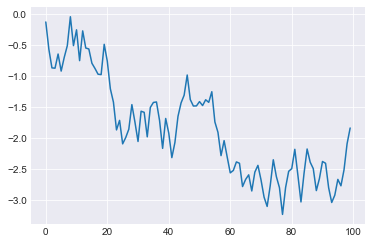

In [5]:
# on crée une figure élémentaire
plt.plot((np.random.random(100) - 0.5).cumsum());

#### Graphique simple

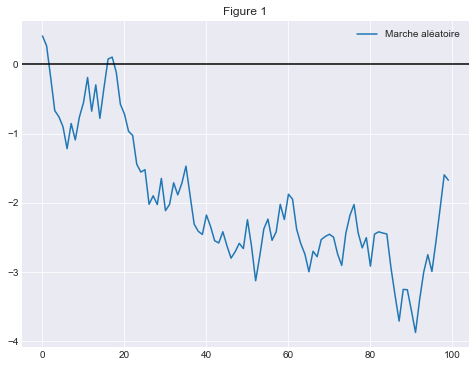

In [6]:
# on crée une figure avec un unique subplot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)  # équivalent à ax = fig.add_subplot(1, 1, 1)
ax.set_title("Figure 1")
ax.plot((np.random.random(100) - 0.5).cumsum())
ax.axhline(y=0, color='k')
ax.legend(["Marche aléatoire"], loc="best")
fig.savefig("test.png", dpi=600);

#### Graphique simple avec plusieurs courbes

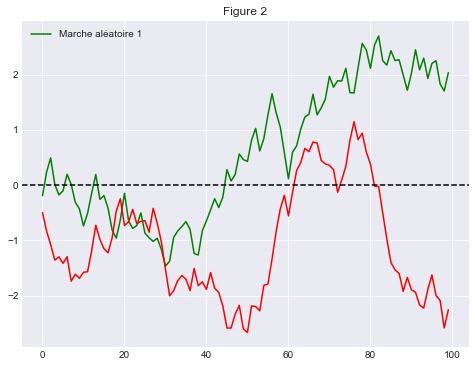

In [8]:
# on crée une figure avec un unique subplot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)  # équivalent à ax = fig.add_subplot(1, 1, 1)
ax.set_title("Figure 2")
ax.plot((np.random.random(100) - 0.5).cumsum(), color='g')
ax.plot((np.random.random(100) - 0.5).cumsum(), color='r')
ax.axhline(y=0, color='k', ls='--')
ax.legend(["Marche aléatoire 1", "Marche aléatoire 2"], loc="best");

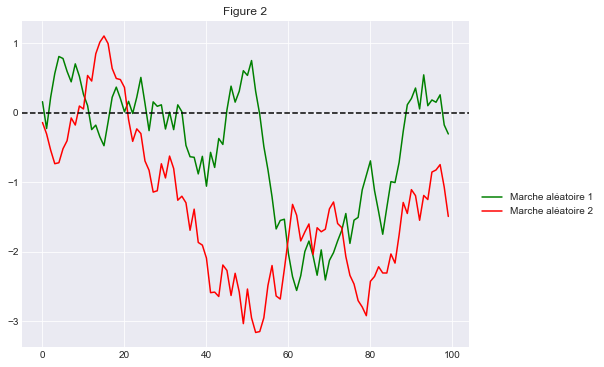

In [10]:
# on crée une figure avec un unique subplot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)  # équivalent à ax = fig.add_subplot(1, 1, 1)
ax.set_title("Figure 2")
ax.plot((np.random.random(100) - 0.5).cumsum(), color='g')
ax.plot((np.random.random(100) - 0.5).cumsum(), color='r')
ax.axhline(y=0, color='k', ls='--')
ax.legend(["Marche aléatoire 1", "Marche aléatoire 2"], bbox_to_anchor=(1.3, 0.5));

#### Positionnement de la légende

Emplacement (chaîne)|Emplacement (code)
-|-
'best'|0
'upper right'|1
'upper left'|2
'lower left'|3
'lower right'|4
'right'|5
'center left'|6
'center right'|7
'lower center'|8
'upper center'|9
'center'|10

Il est également possible de spécifier une position relative avec l'option *bbox_to_anchor=(x, y)* qui fixe la position relative de la légende : 0.0 = bas/gauche, 1.0 = haut/droite.

#### Graphique composé

Utilisation répétée de la méthode **add_subplot()**.

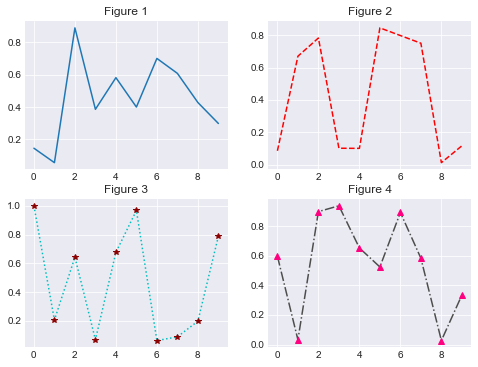

In [11]:
# figure composée
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(221)
ax1.set_title("Figure 1")
ax1.plot(np.random.random(10))
ax2 = fig.add_subplot(222)
ax2.set_title("Figure 2")
ax2.plot(np.random.random(10), 'r--')
ax3 = fig.add_subplot(223)
ax3.set_title("Figure 3")
x = np.random.random(10)
ax3.plot(x, 'c:')
ax3.plot(x, '*', color='darkred')
ax4 = fig.add_subplot(224)
ax4.set_title("Figure 4")
x = np.random.random(10)
ax4.plot(x, '-.', color='0.3')
ax4.plot(x, '^', color='#ff0080');

Idem avec la fonction **subplots()**.

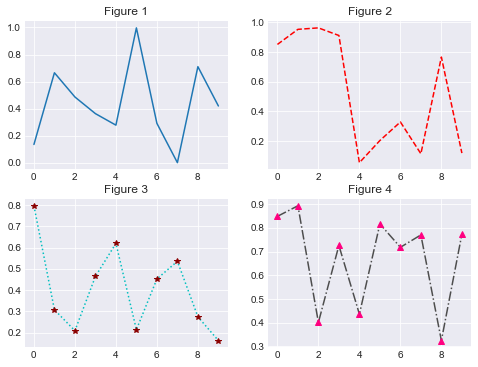

In [8]:
# figure composée
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(8, 6))
ax1.set_title("Figure 1")
ax1.plot(np.random.random(10))
ax2.set_title("Figure 2")
ax2.plot(np.random.random(10), 'r--')
ax3.set_title("Figure 3")
x = np.random.random(10)
ax3.plot(x, 'c:')
ax3.plot(x, '*', color='darkred')
ax4.set_title("Figure 4")
x = np.random.random(10)
ax4.plot(x, '-.', color='0.3')
ax4.plot(x, '^', color='#ff0080');

De base, il existe dans *matplotlib* :
- 4 types de trait : '-' (plein), '--' (tiret), ':' (pointillé), '-.' (alterné)
- plusieurs référentiels de couleurs :
    - 8 couleurs prédéfinies : 'b' (bleu), 'g' (vert), 'r' (rouge), 'c' (cyan), 'm' (magenta), 'y' (jaune), 'k' (noir), 'w' (blanc)
    - niveaux de gris : nombre entre 0 (noir) et 1 (blanc)
    - 150 couleurs nommées : voir la variable *matplotlib.colors.cnames*
    - 16+ millions de couleurs RVB en hexadécimal : #xxyyzz
- 35 marqueurs de point : voir la variable *matplotlib.lines.Line2D.markers*.

In [327]:
import matplotlib
matplotlib.lines.Line2D.markers

{0: 'tickleft',
 1: 'tickright',
 ',': 'pixel',
 3: 'tickdown',
 4: 'caretleft',
 '+': 'plus',
 6: 'caretup',
 7: 'caretdown',
 ' ': 'nothing',
 '1': 'tri_down',
 2: 'tickup',
 None: 'nothing',
 'H': 'hexagon2',
 '2': 'tri_up',
 'p': 'pentagon',
 'None': 'nothing',
 'o': 'circle',
 'D': 'diamond',
 '': 'nothing',
 '|': 'vline',
 'd': 'thin_diamond',
 '3': 'tri_left',
 '>': 'triangle_right',
 '8': 'octagon',
 '<': 'triangle_left',
 'x': 'x',
 's': 'square',
 '.': 'point',
 '_': 'hline',
 '^': 'triangle_up',
 '4': 'tri_right',
 5: 'caretright',
 '*': 'star',
 'h': 'hexagon1',
 'v': 'triangle_down'}

### 6.1.2 Graphiques standards

Un objet *Series* ou *DataFrame* répond à la méthode **plot()** issue de la librairie *matplotlib.pyplot*.

Il existe diférents types de graphiques disponibles :

Option *kind=...*|Type de graphique
-|-
‘line’|line plot (default)
‘bar’|vertical bar plot
‘barh’|horizontal bar plot
‘hist’|histogram
‘box’|boxplot
‘kde’|Kernel Density Estimation plot (estimation par noyau)
‘density’|same as ‘kde’
‘area’|area plot
‘pie’|pie plot
‘scatter’|scatter plot
'hexbin'|hexagone plot

Voir la documentation : http://pandas.pydata.org/pandas-docs/stable/visualization.html

#### Courbes

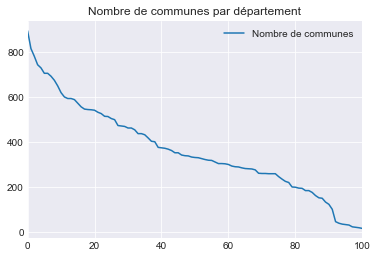

In [12]:
# line plot du nombre de communes par département
s = geo["Département"].value_counts()
ax = s.plot(use_index=None,
            title="Nombre de communes par département")
ax.legend(["Nombre de communes"], loc='best');

In [18]:
hds = thd.loc[thd["Département"] == "HAUTS-DE-SEINE"].loc[:, "Commune":"100 Mbit"]
hds

,Commune,1 Mbit,3 Mbit,8 Mbit,30 Mbit,100 Mbit
Code INSEE,,,,,,
92002,Antony,1.0,0.999,0.999,0.996,0.996
92004,Asnières-sur-Seine,1.0,1.000,1.000,0.977,0.977
92007,Bagneux,1.0,0.998,0.980,0.967,0.963
92009,Bois-Colombes,1.0,1.000,1.000,0.993,0.993
92012,Boulogne-Billancourt,1.0,1.000,1.000,0.999,0.927
92014,Bourg-la-Reine,1.0,1.000,1.000,1.000,0.591
92019,Châtenay-Malabry,1.0,0.999,0.988,0.935,0.935
92020,Châtillon,1.0,1.000,1.000,1.000,1.000
...,...,...,...,...,...,...


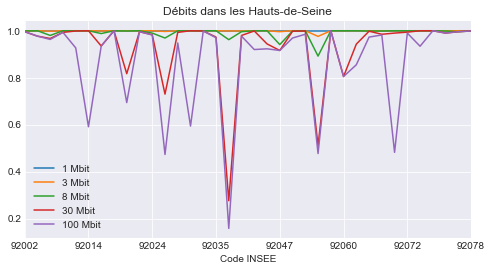

In [22]:
# les taux de 1 à 100 Mbit/s dans les Hauts-de-Seine
hds = thd.loc[thd["Département"] == "HAUTS-DE-SEINE"].loc[:, "Commune":"100 Mbit"]
hds.plot(figsize=(8, 4),
         title="Débits dans les Hauts-de-Seine");

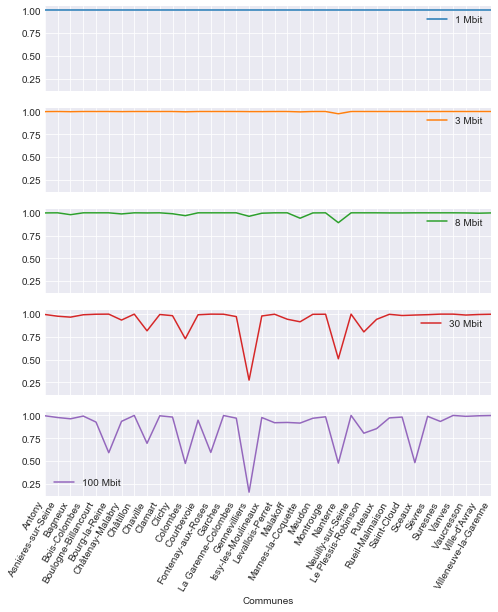

In [21]:
# idem dans des graphiques séparés pour chaque colonne
# il est possible de commenter certains paramètres pour voir l'effet donné
axes = hds.plot(figsize=(8, 10),
                subplots=True,
                sharey=True,
                xticks=range(len(hds)),
                rot=60)
axes[-1].set_xlabel("Communes")
axes[-1].set_xticklabels(hds["Commune"]);

#### Barres verticales

In [23]:
# on sélectionne les données de 2 communes avec la méthode isin()
var = thd.loc[thd["Commune"].isin(["Brest", "Rennes"]), "Commune":"100 Mbit"]
var

,Commune,1 Mbit,3 Mbit,8 Mbit,30 Mbit,100 Mbit
Code INSEE,,,,,,
29019,Brest,1.0,0.993,0.982,0.955,0.811
35238,Rennes,1.0,0.998,0.996,0.987,0.986


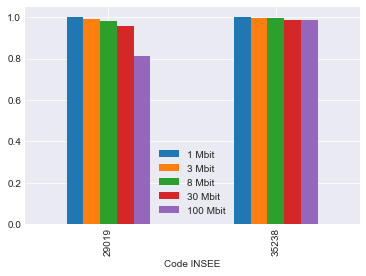

In [24]:
# affichage en barres
var.plot(kind='bar');

Pour obtenir le graphique inverse qui compare deux à deux les débits de chaque ville, il faut transposer le *DataFrame* avec la méthode *transpose()* ou plus simplement *T* et également ne retenir que les données numériques.

In [25]:
# on sélectionne les données numériques de 2 communes avec la méthode isin()
var = thd.loc[thd["Commune"].isin(["Brest", "Rennes"]), "1 Mbit":"100 Mbit"].T
var

Code INSEE,29019,35238
1 Mbit,1.000,1.000
3 Mbit,0.993,0.998
8 Mbit,0.982,0.996
30 Mbit,0.955,0.987
100 Mbit,0.811,0.986


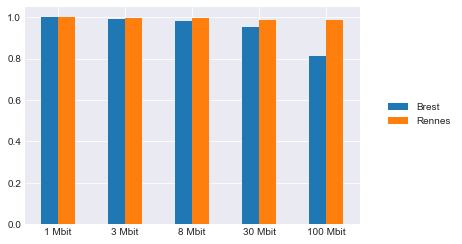

In [26]:
# affichage en barres
ax = var.plot(kind='bar',
              rot=0)
ax.legend(["Brest", "Rennes"], bbox_to_anchor=(1.3, 0.6));

#### Barres horizontales

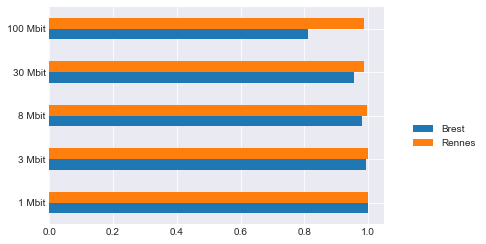

In [27]:
# affichage en barres horizontales
ax = var.plot(kind='barh');
ax.legend(["Brest", "Rennes"], bbox_to_anchor=(1.3, 0.5));

#### Barres empilées

In [28]:
# débits 30 Mbit des 3 technos pour 2 communes
var = thd.loc[thd["Commune"].isin(["Brest", "Rennes"]), ["Commune", "DSL 30 Mbit", "Câble 30 Mbit", "Fibre 30 Mbit"]]
var

,Commune,DSL 30 Mbit,Câble 30 Mbit,Fibre 30 Mbit
Code INSEE,,,,
29019,Brest,0.131,0.947,0.239
35238,Rennes,0.193,0.984,0.264


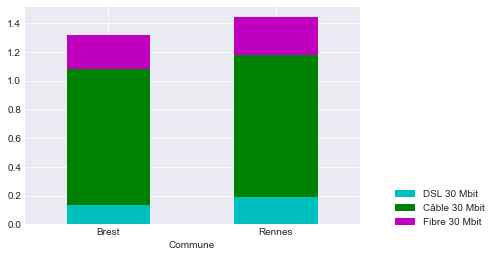

In [29]:
# affichage en barres empilées
ax = var.plot(kind='bar',
              stacked=True,
              color=['c', 'g', 'm'],
              rot=0);
ax.set_xticklabels(var["Commune"])
ax.set_xlabel("Commune")
ax.legend(bbox_to_anchor=(1.4, 0.2));

In [30]:
var.plot?

#### Secteurs

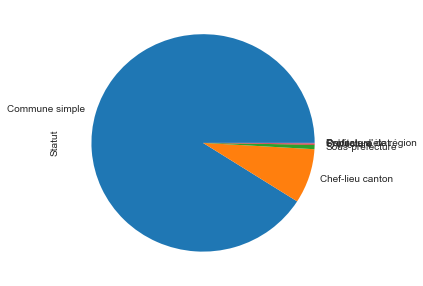

In [31]:
# affichage en secteurs
geo["Statut"].value_counts().plot(figsize=(5, 5), kind='pie');

### 6.1.3 Graphiques statistiques

#### Histogrammes
On peut passer en revue les différents histogrammes par débit.

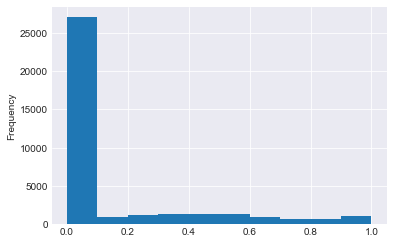

In [35]:
# histogramme
thd["30 Mbit"].plot(kind='hist');  # 1 Mbit, 3 Mbit, 8 Mbit, 30 Mbit, 100 Mbit

Il est possible de modifier la partition qui vaut 10 par défaut.

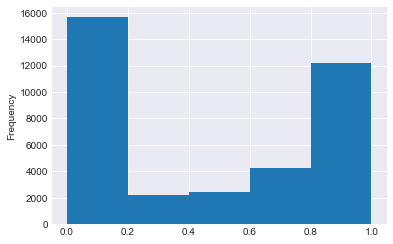

In [36]:
# histogramme
thd["8 Mbit"].plot(kind='hist',
                    bins=5);

#### Boîte à moustaches
Affichage de la médiane, des quartiles et de l'étendue des valeurs.
On peut passer en revue les boites par débit.

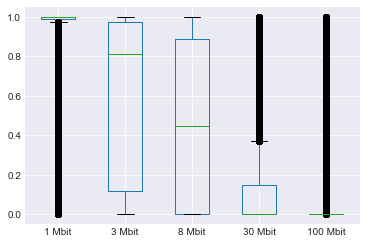

In [37]:
# boite à moustaches du % par débit
thd.loc[:, "1 Mbit":"100 Mbit"].plot(kind='box');

#### Estimateur à noyau
On peut passer en revue les différents noyaux par débit.

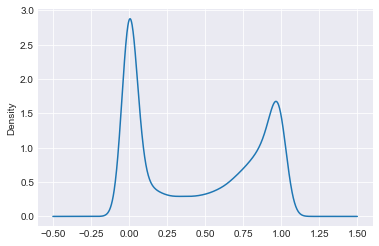

In [38]:
# estimation par noyau du % par débit
thd["8 Mbit"].plot(kind='kde');  # 1 Mbit, 3 Mbit, 8 Mbit, 30 Mbit, 100 Mbit

#### Graphe de retard
Nuage de points d'une séries croisée avec la même série décalée (par défaut de 1). Ce graphe permet de visualiser l'indépendance des valeurs d'une colonne.

On peut afficher les graphes de retard pour les différents débits.

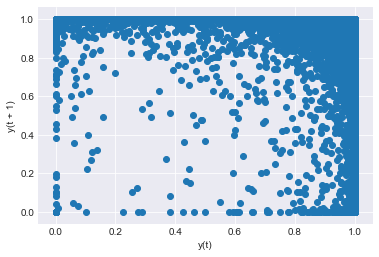

In [39]:
# graphe de retard par débit
from pandas.plotting import lag_plot
lag_plot(thd["1 Mbit"]);

A noter : la méthode **shift()** permet de décaler un objet *Series* ou *DataFrame*.

In [49]:
# colonne Superficie
geo["Superficie"].head()

Code INSEE
01001    1565.0
01002     912.0
01004    2448.0
01005    1605.0
01006     602.0
Name: Superficie, dtype: float64

In [50]:
# colonne Superficie décalée de 1 vers le bas
geo["Superficie"].shift(1).head()

Code INSEE
01001       NaN
01002    1565.0
01004     912.0
01005    2448.0
01006    1605.0
Name: Superficie, dtype: float64

#### Matrices croisées
- Diagonale : histogrammes
- Hors diagonale : nuages de points

On peut tester avec différents départements.

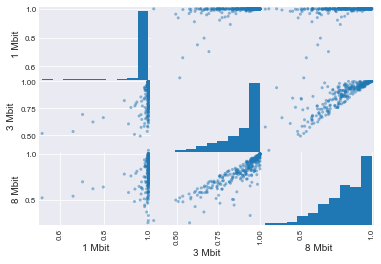

In [52]:
# matrices croisées
from pandas.plotting import scatter_matrix
var = thd.loc[thd["Département"] == "RHONE"]
scatter_matrix(var[["1 Mbit", "3 Mbit", "8 Mbit"]]);

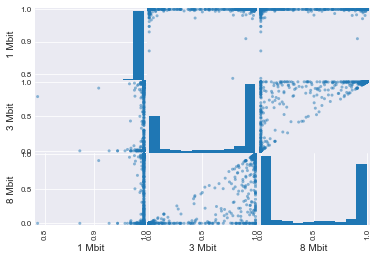

In [53]:
# matrices croisées
var = thd.loc[thd["Département"] == "SOMME"]
scatter_matrix(var[["1 Mbit", "3 Mbit", "8 Mbit"]]);

**Exercice optionnel sur le nombre de lettres des noms de communes**

Créer un objet *Series* avec le nombre de lettres des noms des communes.

Etablir un histogramme et une boite à moustaches pour cet objet *Series*.

### 6.1.4 Nuage de points

On peut obtenir un nuage de points entre l'altitude moyenne et la population des communes. On constate que plus une commune a une altitude élevée moins elle a d'habitants.

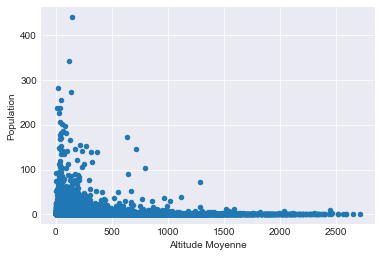

In [54]:
geo.plot(kind='scatter',
       x="Altitude Moyenne",
       y="Population");

### 4.1.5 Cartes (approche naïve)

Puisque nous avons extrait la longitude et la latitude des données par commune. Il est possible de faire un graphique avec les points géométriques de chaque commune.

In [70]:
geo["Latitude"] = geo["geo_point_2d"].apply(lambda x: float(x.split(', ')[0]))
geo["Longitude"] = geo["geo_point_2d"].apply(lambda x: float(x.split(', ')[1]))
geo["Superficie"] /= 100.0
geo["Densité"] = 1000 * geo["Population"] / geo["Superficie"]
geo["Statut"] = geo["Statut"].astype('category',
                                     categories=["Commune simple", "Chef-lieu canton", "Sous-préfecture",
                                                    "Préfecture", "Préfecture de région", "Capitale d'état"],
                                         ordered=True)

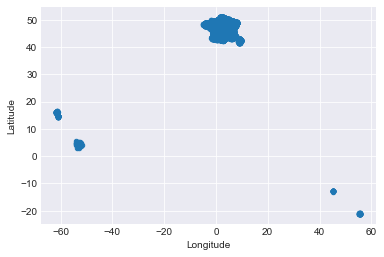

In [71]:
# nuage de points avec les coordonnées géographiques
geo.plot(kind='scatter', x="Longitude", y="Latitude");

On obtient une carte de France avec les DOM.

**Exercice** : Cherchez une condition pour n'afficher que la France métropolitaine (plusieurs solutions possibles).

In [72]:
# %load exos_inter/exo_20.py
# avec la latitude

# avec la longitude

# avec le code postal
metro = geo[geo["Code Postal"] < "96000"]

N.B. : Il existe des données cartographiques opendata utilisables en Python.

Voir Basemap : http://matplotlib.org/basemap/users/intro.html

**Exercice dirrigé optionnel pour l'affichage en projection cylindrique équidistante** 

Les cartes sont déformées car la projection cartésienne d'une sphère à tendance à élargir les distances horizontales (longitudinales) qui sont éloignées de l'équateur (à latitude élevée).

On peut corriger le problème en affichant les valeurs en km et non plus en degrés. Le rayon équatorial vaut $R_{équatorial} = 6378,137  km$ et le rayon polaire vaut $R_{polaire} = 6356,752  km$.

La distance entre 2 points sur l'équateur et séparés par un angle longitudinal $\lambda$ vaut $\lambda \times R_{équatorial}$ où $\lambda$ est exprimé en radiants ($360° = 2 \times \pi$).

La distance entre 2 points sur un même parallèle de latitude $\phi$ et séparés par un angle longitudinal $\lambda$ vaut $\lambda \times R_{équatorial} \times \cos(\phi)$.

La distance entre 2 points sur un même méridien et séparés par un angle latitudinal $\phi$ vaut $\phi \times R_{polaire}$.

On utilise la fonction de conversion des degrés en radiants *np.deg2rad()*.

1) Ecrire une fonction qui transforme les coordonnées angulaires (longitude, latitude) en distances (km).

2) Faire un graphique à 2 colonnes affichant les 2 représentations : projection de Mercator et projection cylindrique équidistante.

3) Rajouter le parallèle à 45° et le méridien de Greewich.

N.B. : Cette méthode demeure une approximation due à la forme non sphérique de la Terre.

Dans la suite de la présentation, on reste en projection de Mercator.

Il est possible d'afficher des zones de couleurs différentes.

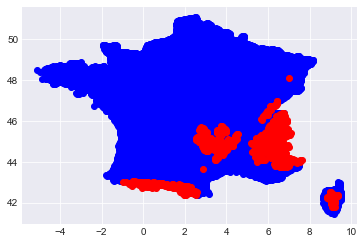

In [60]:
# zones de couleurs différentes
metro1 = metro[metro["Altitude Moyenne"] <= 1000]
metro2 = metro[metro["Altitude Moyenne"] > 1000]
plt.scatter(metro1["Longitude"], metro1["Latitude"], color='blue')
plt.scatter(metro2["Longitude"], metro2["Latitude"], color='red');

**Remarque**

Il existe dans *matplotlib* (et *seaborn*) un système de palettes de couleurs :

- matplotlib : http://matplotlib.org/users/colormaps.html

- seaborn : http://seaborn.pydata.org/tutorial/color_palettes.html

Les librairies gèrent également :

- Les palettes de couleurs de **ColorBrewer** : http://colorbrewer2.org

- Les 954 couleurs nommées de manière participative par l'initiative **xkcd** : https://xkcd.com/color/rgb/ (Voir également la représentation graphique : http://www.luminoso.com/colors/).

L'altitude avec un nuancier bleu.

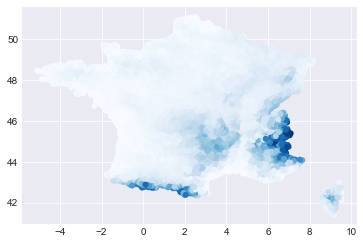

In [61]:
# nuancier bleu
plt.scatter(metro["Longitude"],
            metro["Latitude"],
            c=metro["Altitude Moyenne"],
            cmap=plt.cm.Blues,
            edgecolors='none');

En fait, les points sont dessinés dans l'ordre du *DataFrame*. Donc de petites valeurs affichées en clair peuvent venir effacer des valeurs plus grandes affichées en foncé.

On peut corriger le problème en triant préalablement avec la colonne représentant l'intensité de la couleur.

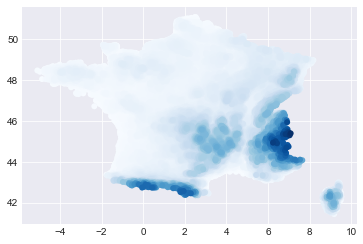

In [62]:
# nuancier bleu avec tri des valeurs
metro2 = metro.sort_values("Altitude Moyenne")
plt.scatter(metro2["Longitude"],
            metro2["Latitude"],
            c=metro2["Altitude Moyenne"],
            cmap=plt.cm.Blues,
            edgecolors='none');

Utilisation de la palette *Spectral* inversée et ajout d'un nuancier.

N.B. : pour chaque palette, son inverse est obtenu avec le suffixe "*_r*"

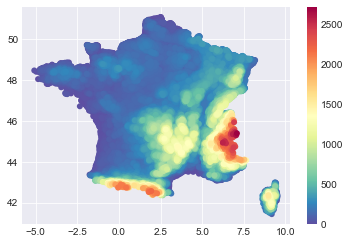

In [63]:
# on utilise plt.cm.Spectral_r
var = plt.scatter(x=metro2["Longitude"],
            y=metro2["Latitude"],
            c=metro2["Altitude Moyenne"],
            cmap=plt.cm.Spectral_r,
            edgecolors='none')
plt.colorbar(var);

**Exercice** :

Sélectionner dans 2 sous-dataframes les villes de statut au moins "Préfecture" et les autres villes.

Afficher les autres villes dans une couleur uniforme.

Trier les villes de statut au moins "Préfecture" selon la "Population" décroissante et les représenter avec un cercle proportionnel à la "Population' (option *s=...*) et dans une couleur égale à la "Densité".

**Question**

Pourquoi le cercle le plus large représente la ville de Toulouse ?

Aide : rechercher les Communes qui contiennent le mot "ARRONDISSEMENT".

Exemple avec des annotations textuelles.

##### Préfectures+ avec Population et Densité

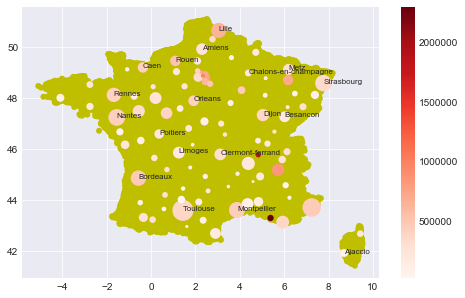

In [73]:
# Noms des préfectures de région
plt.figure(figsize=(8, 5))
metro_A = metro[metro["Statut"] >= "Préfecture"]
metro_A = metro_A.sort_values("Population", ascending=False)
metro_B = metro[metro["Statut"] < "Préfecture"]
# communes
plt.scatter(metro_B["Longitude"],
                metro_B["Latitude"],
               c='y', edgecolors='none')
# préfectures
ax = plt.scatter(metro_A["Longitude"],
                metro_A["Latitude"],
                c=metro_A["Densité"],
                s=metro_A["Population"],
                cmap=plt.cm.Reds,
                edgecolors='none')
# noms des préfectures de région hors PLM
metro_C = metro[(metro["Statut"] >= "Préfecture de région") & ~metro["Commune"].str.contains("ARRONDISSEMENT")]
for i, row in metro_C.iterrows():
    plt.text(row["Longitude"],
                 row["Latitude"],
                 row["Commune"].capitalize(),
                 fontsize=8)
plt.colorbar(ax);

N. B. : Il existe une possibilité d'obtenir des cartes plus fines en utilisant les classes *PatchCollection* et *Polygon* de la librairie *matplotlib* ainsi que les polygones fournis en *JSON*. Il est alors possible d'affecter une couleur à chaque polygone et de le représenter graphiquement.

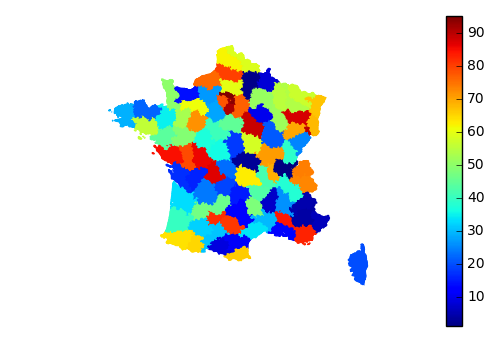

In [74]:
# exemple de carte utilisant les polygones
from IPython.display import Image
Image('patches.png')

## 6.2 Seaborn

Seaborn est une extension de matplotlib qui définit une vingtaine de graphiques pour illustrer des distributions, des régressions, des représentations catégorielles, des matrices et des séries temporelles.

Nous allons étudier quelques graphiques.

### 6.2.1 barplot

Show point estimates and confidence intervals as rectangular bars.

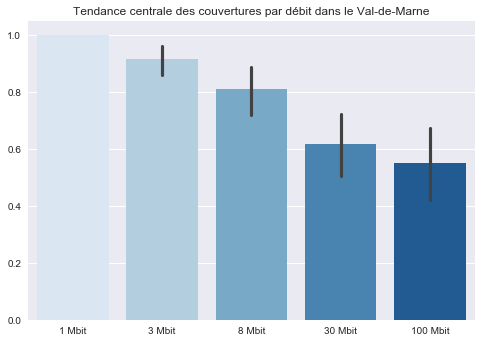

In [75]:
import seaborn as sns

# seaborn barplot
val = thd[thd["Département"] == "VAL-DE-MARNE"].loc[:, "1 Mbit":"100 Mbit"]
g = sns.barplot(data=val, palette="Blues")
g.axes.set_title('Tendance centrale des couvertures par débit dans le Val-de-Marne');

### 6.2.2 countplot

Show the counts of observations in each categorical bin using bars.

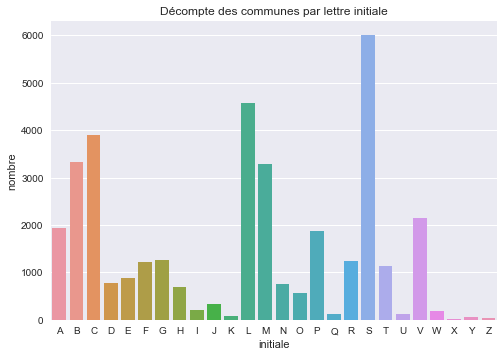

In [76]:
# seaborn countplot
geo.sort_values("Commune", inplace=True)
geo["initiale"] = geo["Commune"].apply(lambda x: x[0])
g = sns.countplot(data=geo, x="initiale")
g.axes.set_ylabel('nombre')
g.axes.set_title('Décompte des communes par lettre initiale');

### 6.2.3 tsplot

Plot one or more timeseries with flexible representation of uncertainty.

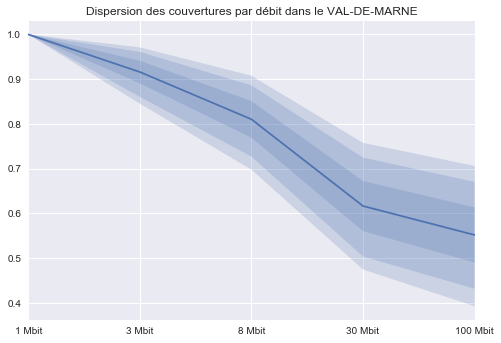

In [77]:
# seaborn tsplot
val = thd[thd["Département"] == "VAL-DE-MARNE"].loc[:, "1 Mbit":"100 Mbit"]
g = sns.tsplot(data=val.values, ci=[68,95,99])  # tester avec ci=[68,95]
g.axes.set_title('Dispersion des couvertures par débit dans le VAL-DE-MARNE')
g.set_xticks(np.arange(len(val.columns)))
g.set_xticklabels(val.columns);

### 6.2.4 distplot + kdeplot

Flexibly plot a univariate distribution of observations.

+ **kdeplot** Fit and plot a univariate or bivariate kernel density estimate.

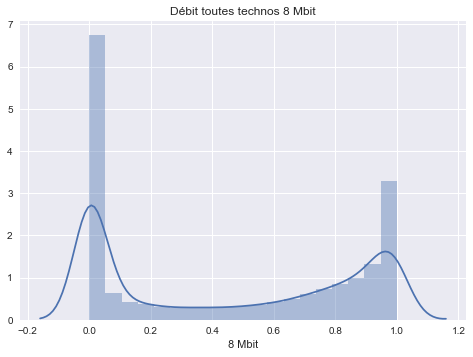

In [78]:
# seaborn distplot
g = sns.distplot(thd["8 Mbit"])
g.axes.set_title('Débit toutes technos 8 Mbit');

### 6.2.4 distplot + rugplot

Flexibly plot a univariate distribution of observations.

+ **rugplot** Plot datapoints in an array as sticks on an axis.

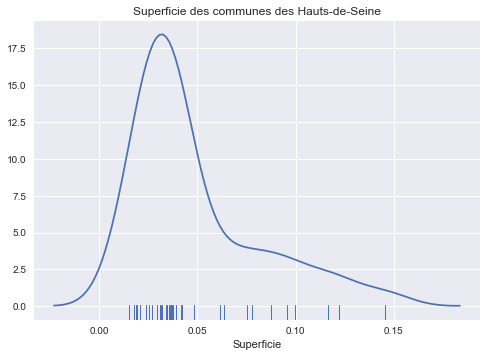

In [79]:
# seaborn distplot
var = geo[geo['Département'] == 'HAUTS-DE-SEINE']
g = sns.distplot(var["Superficie"], hist=False, rug=True)
g.axes.set_title('Superficie des communes des Hauts-de-Seine');

### 6.2.5 violinplot

Draw a combination of boxplot and kernel density estimate.

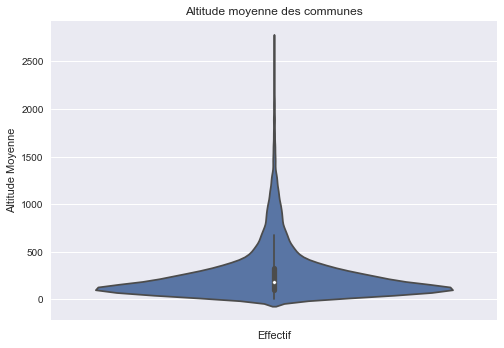

In [80]:
# seaborn violinplot
g = sns.violinplot(geo["Altitude Moyenne"], orient='v')
g.axes.set_title('Altitude moyenne des communes')
g.axes.set_xlabel('Effectif')
g.axes.set_ylabel('Altitude Moyenne');

### 6.2.6 regplot

Plot data and a linear regression model fit.

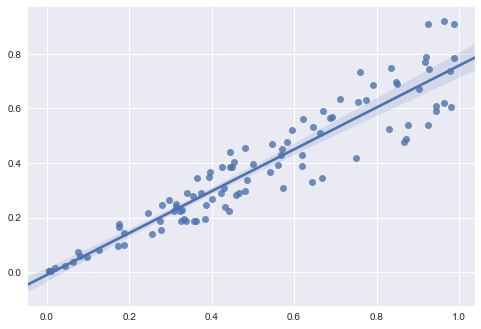

In [81]:
# seaborn regplot
x = np.random.random(100)
y = x * (1 + np.random.random(100)) / 2
g = sns.regplot(x, y);

### 6.2.7 stripplot

Draw a scatterplot where one variable is categorical.

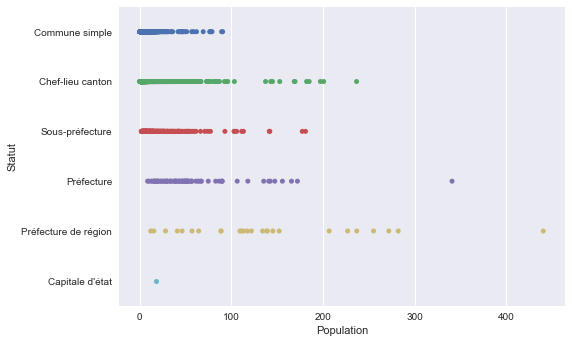

In [82]:
# seaborn stripplot
sns.stripplot(x="Population", y="Statut", data=geo);

### 6.2.8 heatmap

Plot rectangular data as a color-encoded matrix.

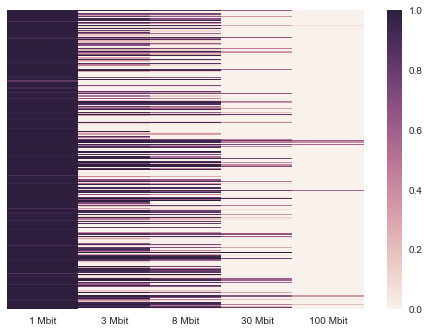

In [83]:
# seaborn heatmap
var = thd[thd["Département"] == "CANTAL"]
g = sns.heatmap(data=var.loc[:, "1 Mbit":"100 Mbit"])
g.set_yticks([])
g.set_ylabel('');

**Exercice**

Afficher une carte de chaleur avec les corrélations du *DataFrame* thd.

Ajouter des lignes blanches horizontales et verticales séparant les technologies.